# Keterangan Tugas

Film Junky Union, sebuah komunitas baru bagi penggemar film klasik sedang mengembangkan sistem untuk memfilter dan mengategorikan ulasan film. Misi utamanya adalah melatih model agar bisa mendeteksi ulasan negatif secara otomatis. Anda akan menggunakan *dataset* ulasan film IMBD dengan pelabelan polaritas untuk membuat sebuah model yang bisa mengklasifikasikan ulasan positif dan negatif. Model ini setidaknya harus memiliki skor F1 sebesar 0,85.

## Inisialisasi

In [3]:
import math

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

In [4]:
# Konfigurasi agar Matplotlib hasil visualisasi dapat tercetak pada Jupyter Notebook.
%matplotlib inline
%config InlineBackend.figure_format = 'png'

# konfigurasi agar menyediakan grafik dengan kualitas yang lebih baik di layar HiDPI 
%config InlineBackend.figure_format = 'retina'

# Konfigurasi stylesheet seaborn
plt.style.use('seaborn')

In [5]:
# konfigurasi bar-process di jupyter notebook
tqdm.pandas()

## Memuat data

In [6]:
# Memuat data
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [7]:
# Melihat data secara sekilas
df_reviews.iloc[200:250,:]

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
200,tt0331338,movie,16 Years of Alcohol,16 Years of Alcohol,2003,\N,102,0,"Crime,Drama",6.3,1627,"This film was a yawn from titles to credits, i...",1,neg,0,train,9346
201,tt0331338,movie,16 Years of Alcohol,16 Years of Alcohol,2003,\N,102,0,"Crime,Drama",6.3,1627,I found this film embarrassing to watch. I fel...,1,neg,0,train,9348
202,tt0331338,movie,16 Years of Alcohol,16 Years of Alcohol,2003,\N,102,0,"Crime,Drama",6.3,1627,This movie was terrible. The first half hour i...,1,neg,0,train,9350
203,tt0331338,movie,16 Years of Alcohol,16 Years of Alcohol,2003,\N,102,0,"Crime,Drama",6.3,1627,This is only the second time I stopped a video...,1,neg,0,train,9351
204,tt0331338,movie,16 Years of Alcohol,16 Years of Alcohol,2003,\N,102,0,"Crime,Drama",6.3,1627,This film was terrible. I have given it the hi...,2,neg,0,train,9349
205,tt0331338,movie,16 Years of Alcohol,16 Years of Alcohol,2003,\N,102,0,"Crime,Drama",6.3,1627,You can often tell a movie didn't turn out lik...,2,neg,0,train,9352
206,tt0331338,movie,16 Years of Alcohol,16 Years of Alcohol,2003,\N,102,0,"Crime,Drama",6.3,1627,There is a key aspect of film that Jobson seem...,2,neg,0,train,9354
207,tt0331338,movie,16 Years of Alcohol,16 Years of Alcohol,2003,\N,102,0,"Crime,Drama",6.3,1627,This film limps from self indulgent moment to ...,3,neg,0,train,9347
208,tt0331338,movie,16 Years of Alcohol,16 Years of Alcohol,2003,\N,102,0,"Crime,Drama",6.3,1627,I got lured by the title... I was expecting an...,3,neg,0,train,9353
209,tt0068156,movie,1776,1776,1972,\N,141,0,"Drama,Family,History",7.6,7384,I guess you have to give some points for the s...,2,neg,0,train,6712


In [8]:
# Memeriksa informasi data
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

<div class="alert-info">
    

<b>Note</b>

<b>tconst</b> - Kode unik untuk sebuah tittle film. - Data OK <br>
<b>title_type</b> - Type film. - Data OK <br>
<b>primary_title</b> - Judul utama film. - Data OK <br>
<b>original_title</b> - Judul asli film. - Data OK <br>
<b>start_year</b> - tahun launching film. - Data OK <br>
<b>end_year</b> - - Data OK <br>
<b>runtime_minutes</b> - Durasi Film. - Data OK <br>
<b>is_adult</b> - Boolean film dewasa. - Data OK <br>
<b>genres</b> - Genre Film. - Data OK <br>
<b>average_rating</b> - rata-rata rating film. - Terdapat 2 data yang hilang <br>
<b>votes</b> - - Terdapat 2 data yang hilang <br>
<b>review</b> - Review film - Data OK <br>
<b>rating</b> -  - Data OK <br>
<b>sp</b> - Jenis kelamin. - Data OK <br>
<b>pos</b> - target, '0' untuk rating negatif dan '1' untuk rating positif. - Data OK <br>
<b>ds_part</b> - train'/'test' untuk bagian train/test dari datase. - Data OK <br>
<b>idx</b> - - Data OK <br>

In [9]:
# Memeriksa nilai pada kolom 'end_year'
df_reviews['end_year'].unique()

array(['\\N', '1999', '2008', '2005', '1987', '1981', '1990', '2009',
       '1985', '1986', '2004', '2002', '1994', '2007', '1996', '1960',
       '2000', '2012', '2010', '2013', '1980', '2003', '2001', '2011',
       '1978', '2006', '1973', '2017', '1997', '1998', '1984', '1983',
       '1995', '1974', '1970', '1989', '2020', '1988', '1979', '1993',
       '2018', '1977', '1968', '2014', '1975', '1962', '1972', '1976',
       '2016', '1955', '1965', '1982', '1961', '1991', '1969', '1966',
       '1957', '2019', '1953', '1959'], dtype=object)

In [10]:
end_year_n = len(df_reviews.loc[df_reviews['end_year'] == r'\N']) / len(df_reviews) *100
print(f' Persentasi nilai yang tidak terdefenisi pada kolom end_year : {round(end_year_n, 2)} %')

 Persentasi nilai yang tidak terdefenisi pada kolom end_year : 95.18 %


<div class="alert-info">
    

<b>Note</b>

Terlalu banyak data yang tidak diketahui pada kolom "end_year"
sebanyak 95,18% dari total data

In [11]:
# Memeriksa nilai pada kolom 'is_adult'
df_reviews['is_adult'].value_counts()

0    47249
1       82
Name: is_adult, dtype: int64

In [12]:
# Memeriksa nilai pada kolom 'sp'
df_reviews['sp'].value_counts()

neg    23715
pos    23616
Name: sp, dtype: int64

<div class="alert-info">
    

<b>Note</b>

- neg = Negatif
- pos = Positif

In [13]:
# Membuang nilai yang hilang pada data
df_reviews = df_reviews.dropna()
print(df_reviews.isna().sum())
print(df_reviews.shape)

tconst             0
title_type         0
primary_title      0
original_title     0
start_year         0
end_year           0
runtime_minutes    0
is_adult           0
genres             0
average_rating     0
votes              0
review             0
rating             0
sp                 0
pos                0
ds_part            0
idx                0
dtype: int64
(47329, 17)


In [14]:
# Memeriksa nilai duplikat pada data
df_reviews.duplicated().sum()

0

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## EDA

Periksa jumlah film dan ulasan selama beberapa tahun.

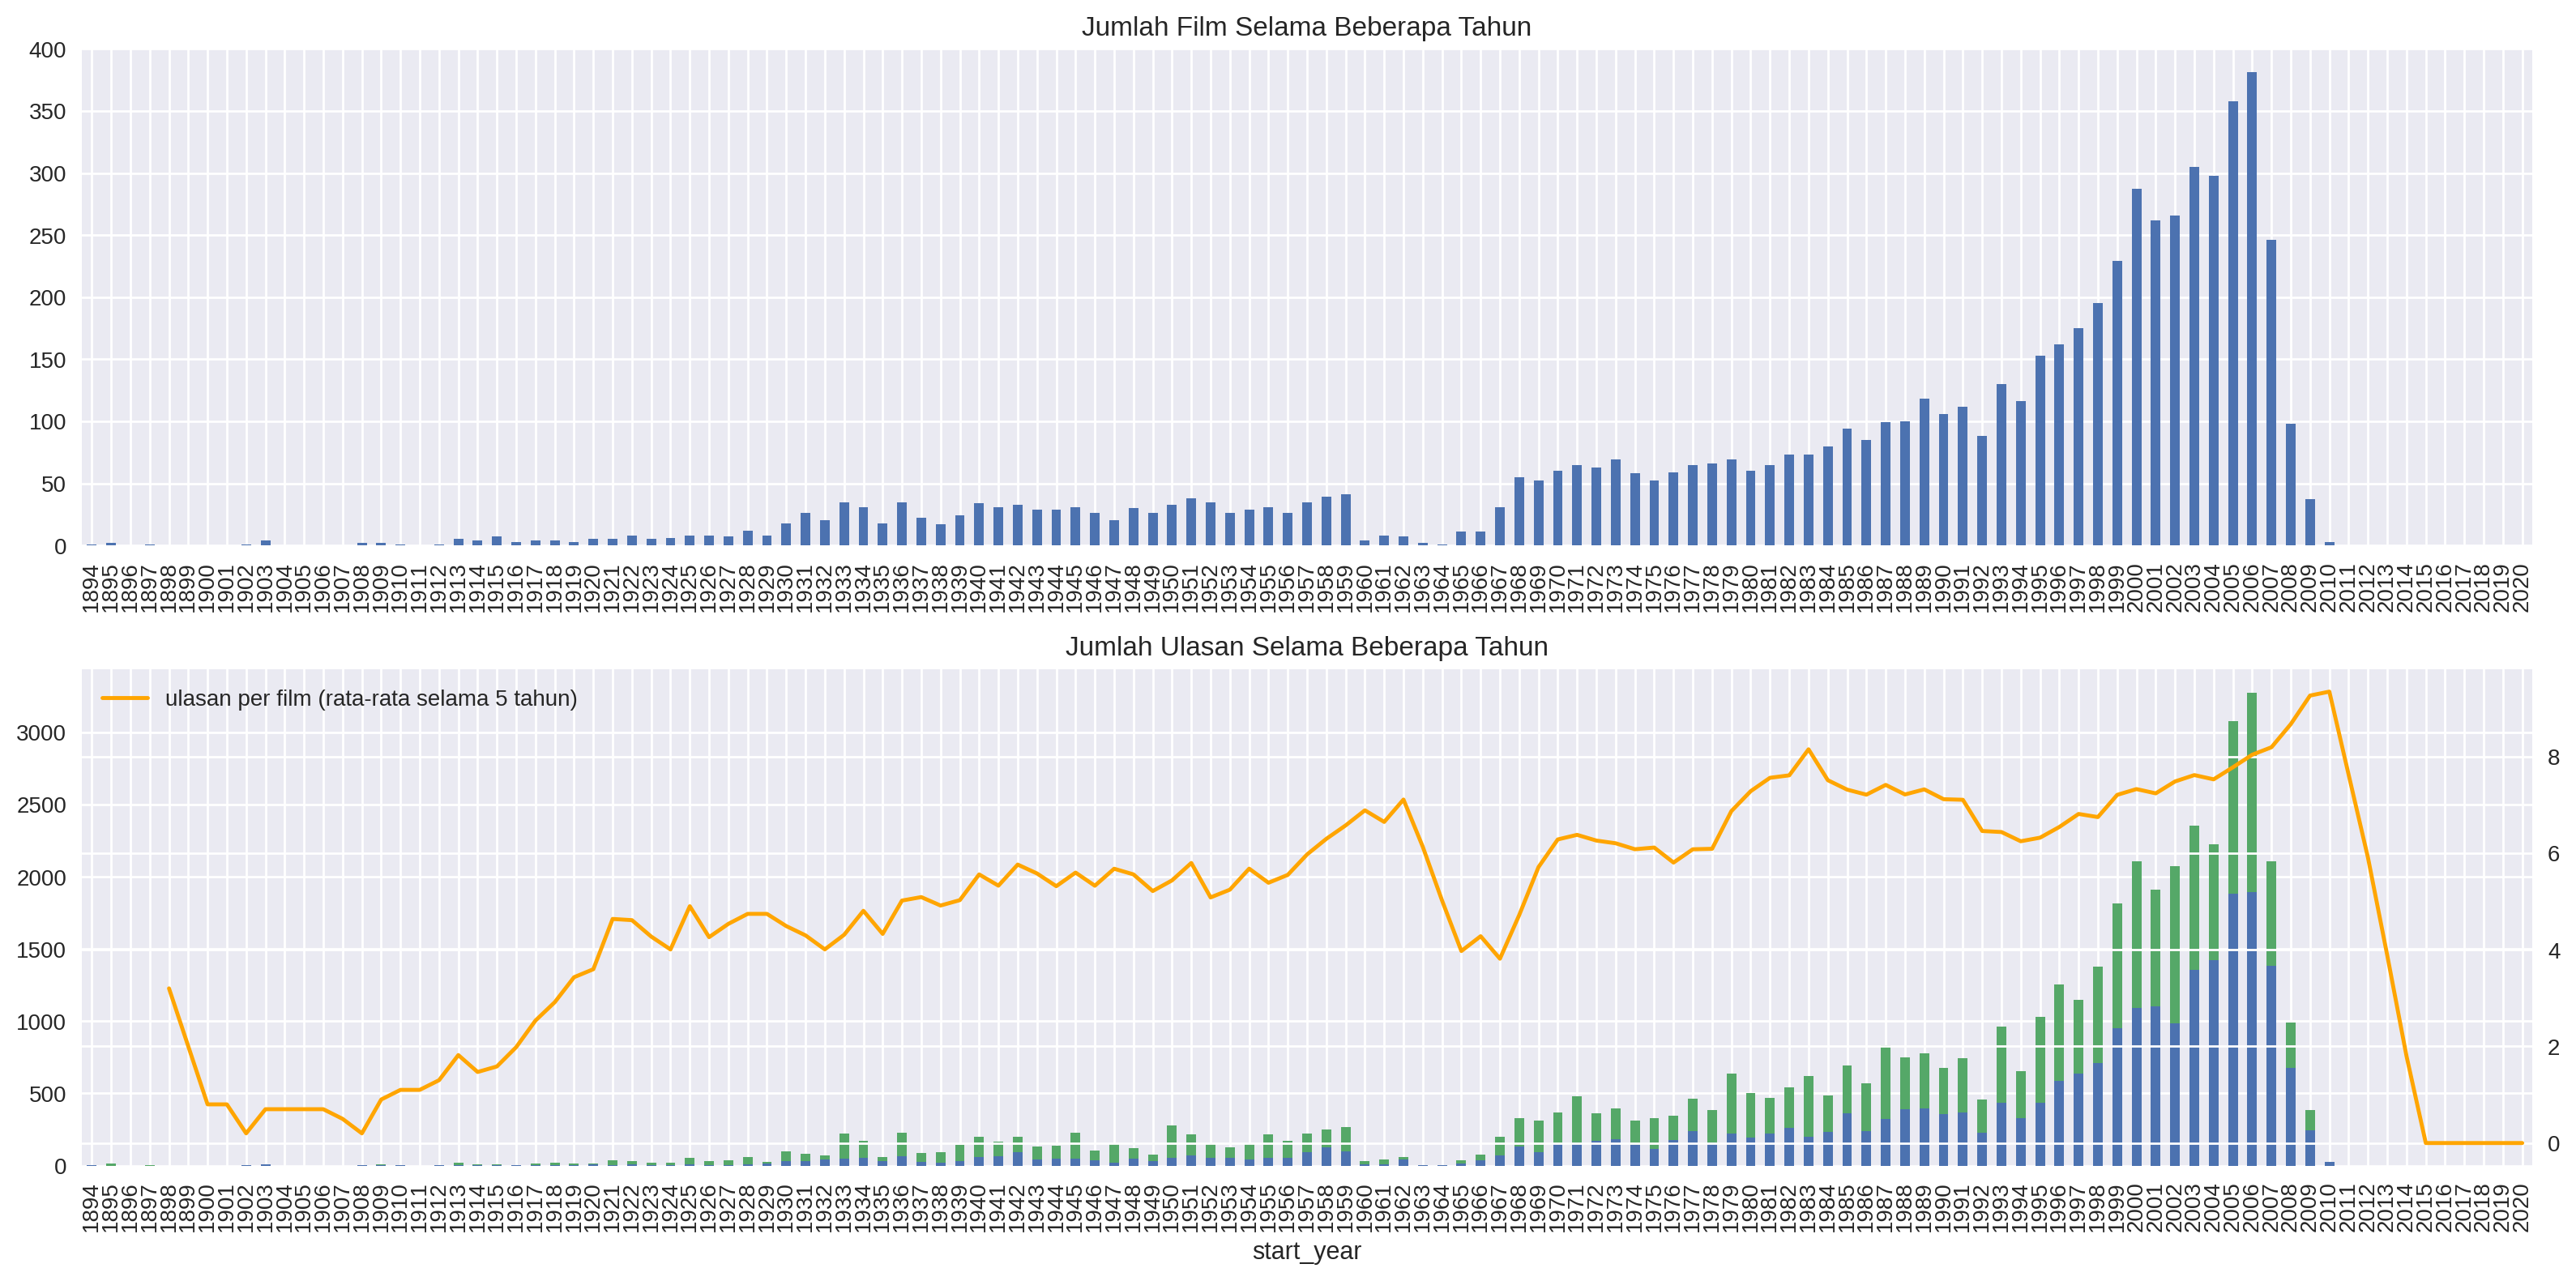

In [15]:
# Membuat beberapa subplot, 2 menyatakan 2 gambar vertikal yang akan dibentuk.
# 1 menyatakan, 1 gambar kolom yang akan terbentuk.
# 16,8 merupakan ukuran gambar yang akan terbentuk
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

# define gambar pertama
ax = axs[0]

# Mendapatkan persebaran data film yang telah dibuat berdasarkan tahun dan disortir berdasarkan tahun
dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()

#Melakukan indexing mulai dari terlampau hingga 2021
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)

# menampilkan gambar dalam bentuk bar untuk gambar pertama ax[0] 
dft1.plot(kind='bar', ax=ax)
ax.set_title('Jumlah Film Selama Beberapa Tahun')

# define gambar kedua
ax = axs[1]

# Mendapatkan jumlah review negatif dan positif setiap tahunnya.
dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()

# Melakukan indexing mulai dari tahun terlampau hingga 2021.
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

# Menampilkan gambar dalam bentuk bar bertumpuk untuk gambar kedua ax[1]
dft2.plot(kind='bar', stacked=True, label='#ulasan  (neg, pos)', ax=ax)

# Mendapatkan jumlah review berdasarkan tahun rilis.
dft2 = df_reviews['start_year'].value_counts().sort_index()

# melakukan indexing mulai dari tahun terlampau hingga 2021
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

# Mendapatkan rata-rata review film pertahun dengan perhitungan total review dibagi dengan jumlah film per tahunnya.
dft3 = (dft2/dft1).fillna(0)

# Menetapkan axis baru
axt = ax.twinx()

# menetapkan axis baru untuk nilai rata-rata review film dengan rata-rata 5 tahun
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='ulasan per film (rata-rata selama 5 tahun)', ax=axt)

# Menambahkan legend atau catatan axis rata-rata review pada gambar
lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Jumlah Ulasan Selama Beberapa Tahun') 

fig.tight_layout()

<div class="alert-info">
    

<b>Note</b>

- distribusi persebaran jumlah film yang rilis dengan review film pertahunnya Hampir serupa.

Periksa distribusi jumlah ulasan per film dengan penghitungan yang tepat dan KDE (hanya untuk mengetahui perbedaannya dari penghitungan yang tepat)

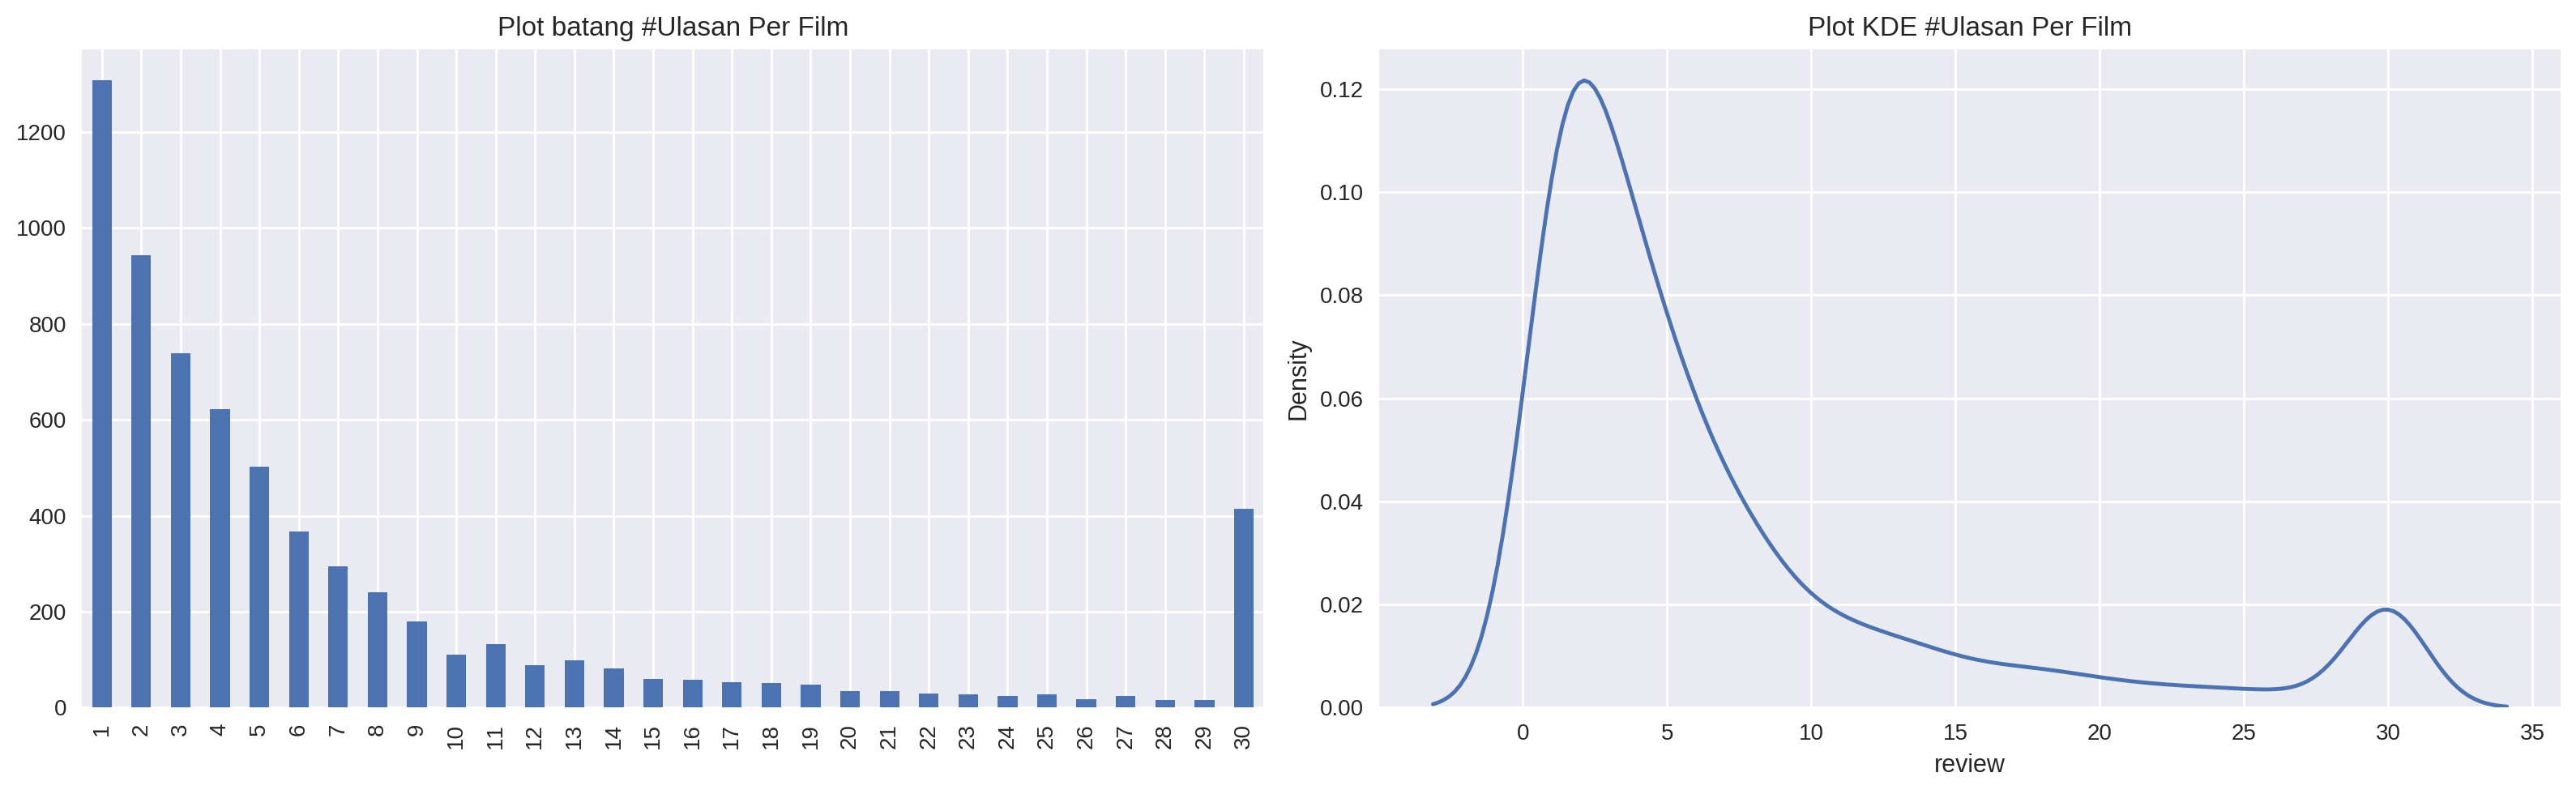

In [16]:
# Membuat beberapa subplot, 1 menyatakan 1 gambar vertikal yang akan dibentuk.
# 2 menyatakan, 2 gambar kolom yang akan terbentuk.
# 16,5 merupakan ukuran skala gambar yang akan terbentuk
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Plot batang #Ulasan Per Film')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Plot KDE #Ulasan Per Film') 

fig.tight_layout()

<div class="alert-info">
    

<b>Note</b>

- Kurang lebih 14-15% film, tidak mendapatkan review.
- ada beberapa kasus tertentu, film mendapatkan 30 review

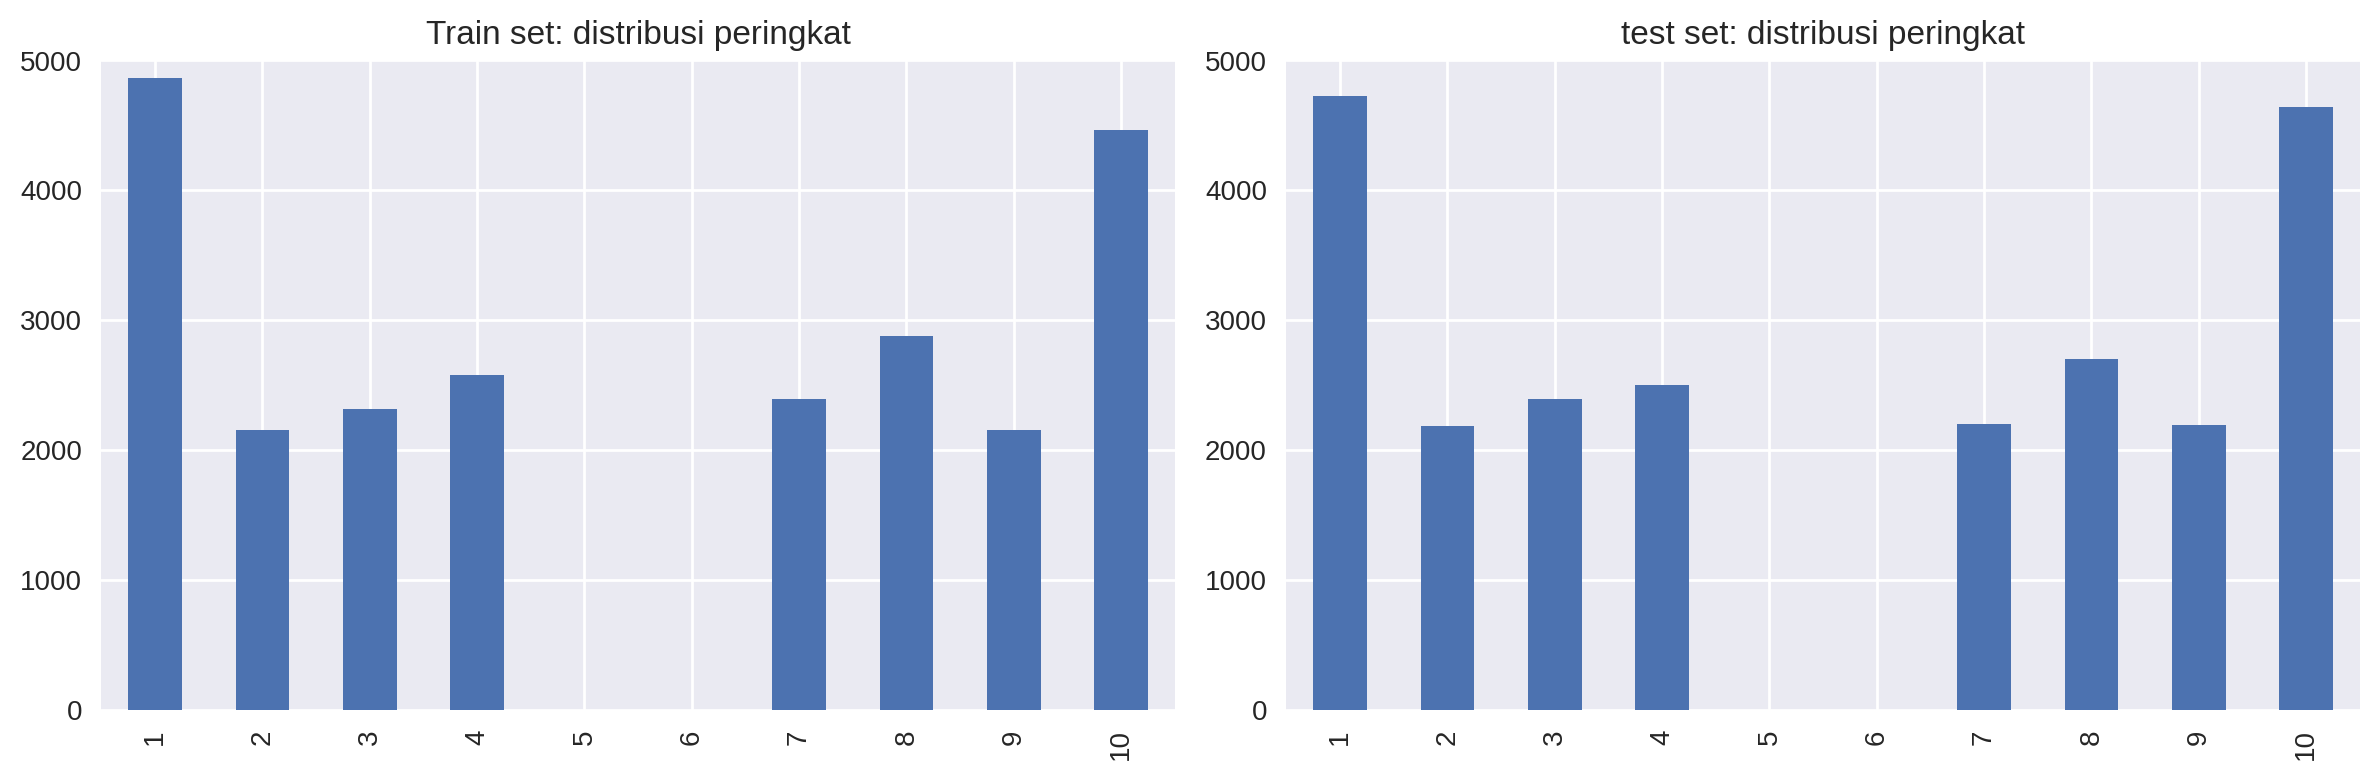

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('Train set: distribusi peringkat')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('test set: distribusi peringkat')

fig.tight_layout()

<div class="alert-info">
    

<b>Note</b>

- Persebaran data rating Train dan test hampir serupa

Distribusi ulasan negatif dan positif selama bertahun-tahun untuk dua bagian *dataset*

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


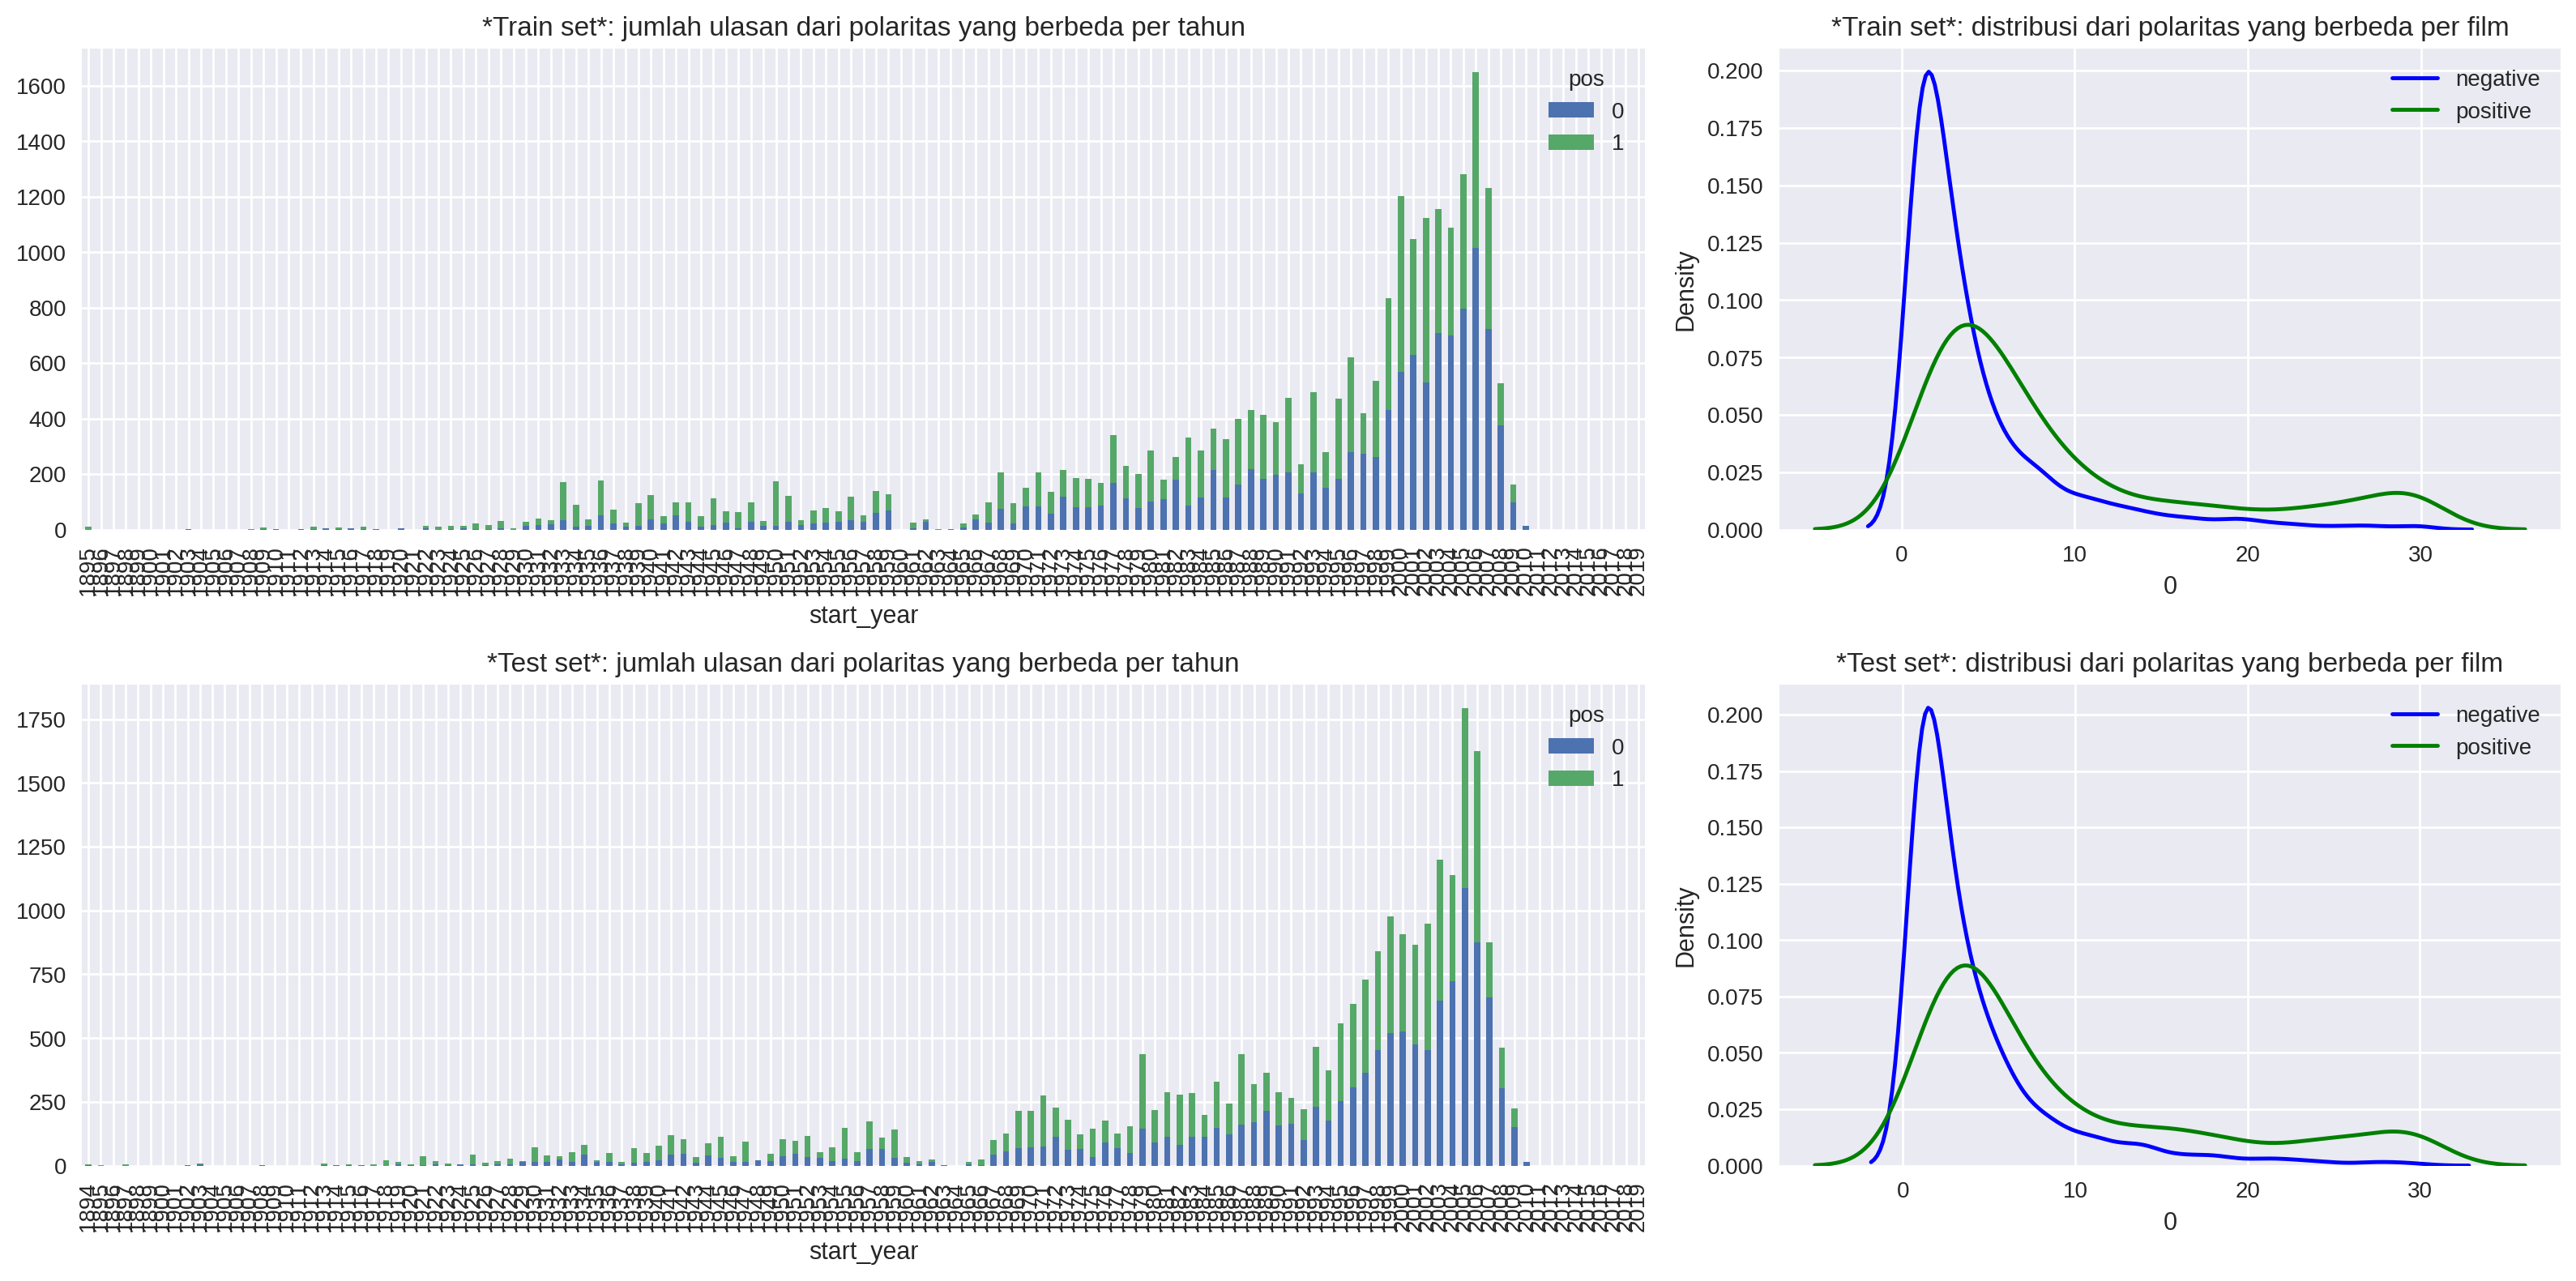

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('*Train set*: jumlah ulasan dari polaritas yang berbeda per tahun')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('*Train set*: distribusi dari polaritas yang berbeda per film')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('*Test set*: jumlah ulasan dari polaritas yang berbeda per tahun')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('*Test set*: distribusi dari polaritas yang berbeda per film')

fig.tight_layout()

<div class="alert-info">
    

<b>Note</b>

- Persebaran data review positif dan negatif pada data Train dan test hampir serupa

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Prosedur Evaluasi

Menyusun evaluasi yang dapat digunakan untuk semua model dalam tugas ini secara rutin

In [66]:
import sklearn.metrics as metrics

def evaluate_model(model, train_features, train_target, test_features, test_target):

    eval_stats = {}

    fig, axs = plt.subplots(1, 3, figsize=(20, 6))

    for type, features, target in (('train', train_features, train_target), ('test', test_features, test_target)):

        eval_stats[type] = {}

        pred_target = model.predict(features)
        pred_proba = model.predict_proba(features)[:, 1]

        # F1
        f1_thresholds = np.arange(0, 1.01, 0.05)
        f1_scores = [metrics.f1_score(target, pred_proba>=threshold) for threshold in f1_thresholds]

        # ROC
        fpr, tpr, roc_thresholds = metrics.roc_curve(target, pred_proba)
        roc_auc = metrics.roc_auc_score(target, pred_proba)
        eval_stats[type]['ROC AUC'] = roc_auc

        # PRC
        precision, recall, pr_thresholds = metrics.precision_recall_curve(target, pred_proba)
        aps = metrics.average_precision_score(target, pred_proba)
        eval_stats[type]['Average Precision Score'] = aps

        if type == 'train':
            color = 'blue'
        else:
            color = 'green'

        # F1 Score
        ax = axs[0]
        max_f1_score_idx = np.argmax(f1_scores)
        ax.plot(f1_thresholds, f1_scores, color=color, label=f'{type}, max={f1_scores[max_f1_score_idx]:.2f} @ {f1_thresholds[max_f1_score_idx]:.2f}')
        # set crosses for multiple thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(f1_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(f1_thresholds[closest_value_idx], f1_scores[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('threshold')
        ax.set_ylabel('F1')
        ax.legend(loc='lower center')
        ax.set_title(f'F1 Score')

        # ROC
        ax = axs[1]
        ax.plot(fpr, tpr, color=color, label=f'{type}, ROC AUC={roc_auc:.2f}')
        # set crosses for multiple thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(roc_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(fpr[closest_value_idx], tpr[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.plot([0, 1], [0, 1], color='grey', linestyle='--')
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('FPR')
        ax.set_ylabel('TPR')
        ax.legend(loc='lower center')
        ax.set_title(f'ROC Curve')

        # PRC
        ax = axs[2]
        ax.plot(recall, precision, color=color, label=f'{type}, AP={aps:.2f}')
        # set crosses for multiple thresholds
        for threshold in (0.2, 0.4, 0.5, 0.6, 0.8):
            closest_value_idx = np.argmin(np.abs(pr_thresholds-threshold))
            marker_color = 'orange' if threshold != 0.5 else 'red'
            ax.plot(recall[closest_value_idx], precision[closest_value_idx], color=marker_color, marker='X', markersize=7)
        ax.set_xlim([-0.02, 1.02])
        ax.set_ylim([-0.02, 1.02])
        ax.set_xlabel('recall')
        ax.set_ylabel('precision')
        ax.legend(loc='lower center')
        ax.set_title(f'PRC')

        eval_stats[type]['Accuracy'] = metrics.accuracy_score(target, pred_target)
        eval_stats[type]['F1'] = metrics.f1_score(target, pred_target)

    df_eval_stats = pd.DataFrame(eval_stats)
    df_eval_stats = df_eval_stats.round(2)
    df_eval_stats = df_eval_stats.reindex(index=('Accuracy', 'F1', 'APS', 'ROC AUC'))

    print(df_eval_stats)

    return

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Normalisasi

Kita menganggap semua model di bawah menerima teks dalam huruf kecil dan tanpa angka, tanda baca, dll.

In [20]:
df_reviews['review_norm'] =  df_reviews['review'].str.lower().replace('[^\w\s]|[0-9]','', regex=True)

In [21]:
df_reviews['review_norm'][0]

'the pakage implies that warren beatty and goldie hawn are pulling off a huge bank robbery but thats not what i got out of it i didnt get anything in the first half theres a new character without introduction in every other scene the first halfhour is completely incomprehensible the rest is just one long annoying underlit chase scene theres always an irritating sound in the background whether its a loud watch ticking a blaring siren a train whistling or even the horrible score by quincy jones there are a lot of parts that are laughably bad too like the bad guys chasing beatty on thin ice with a car or the police arriving at the scene roughly fifteen times i really hated this movie'

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

## Pemisahan Train / Test

Untungnya, seluruh *dataset* sudah dibagi menjadi *train/test*. Bendera yang sesuai adalah 'ds_part'.

In [22]:
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23796, 18)
(23533, 18)


## Bekerja dengan Model

### Model 0 - Konstan

In [27]:
from sklearn.dummy import DummyClassifier

In [28]:
clf_dummy = DummyClassifier(strategy ='constant',constant=1)
clf_dummy.fit(df_reviews_train, train_target)

DummyClassifier(constant=1, strategy='constant')

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
APS        0.50  0.50
ROC AUC    0.50  0.50


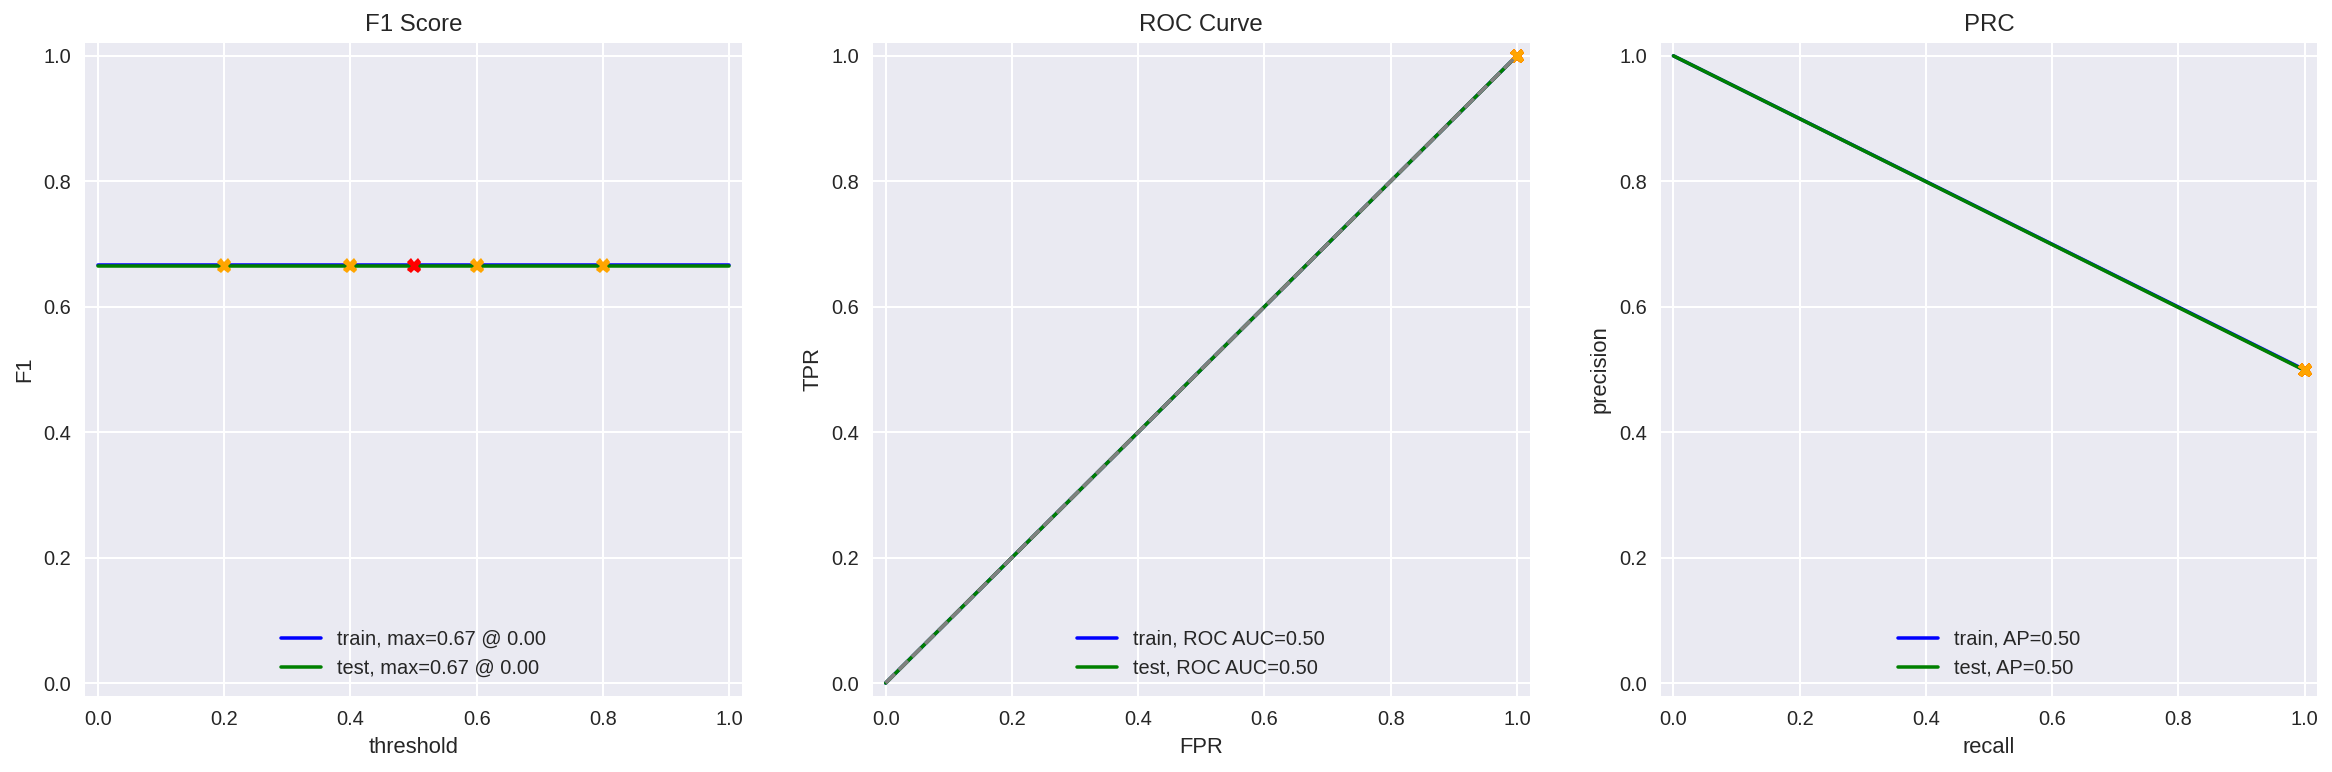

In [29]:
evaluate_model(clf_dummy, np.empty(len(train_target)), train_target, np.empty(len(test_target)), test_target)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Model 1 - NLTK, TF-IDF dan LR

TF-IDF

In [30]:
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

from nltk.corpus import stopwords

In [31]:
train_corpus = df_reviews_train['review_norm']
stop_words = set(stopwords.words('english'))
count_tf_idf = TfidfVectorizer(stop_words=stop_words)

tf_idf = count_tf_idf.fit_transform(train_corpus)
features_train =  tf_idf
test_corpus = df_reviews_test['review_norm']
features_test = count_tf_idf.transform(test_corpus)

features_test = count_tf_idf.transform(test_corpus)
lr = LogisticRegression().fit(features_train, train_target)

          train  test
Accuracy   0.94  0.88
F1         0.94  0.88
APS        0.98  0.95
ROC AUC    0.98  0.95


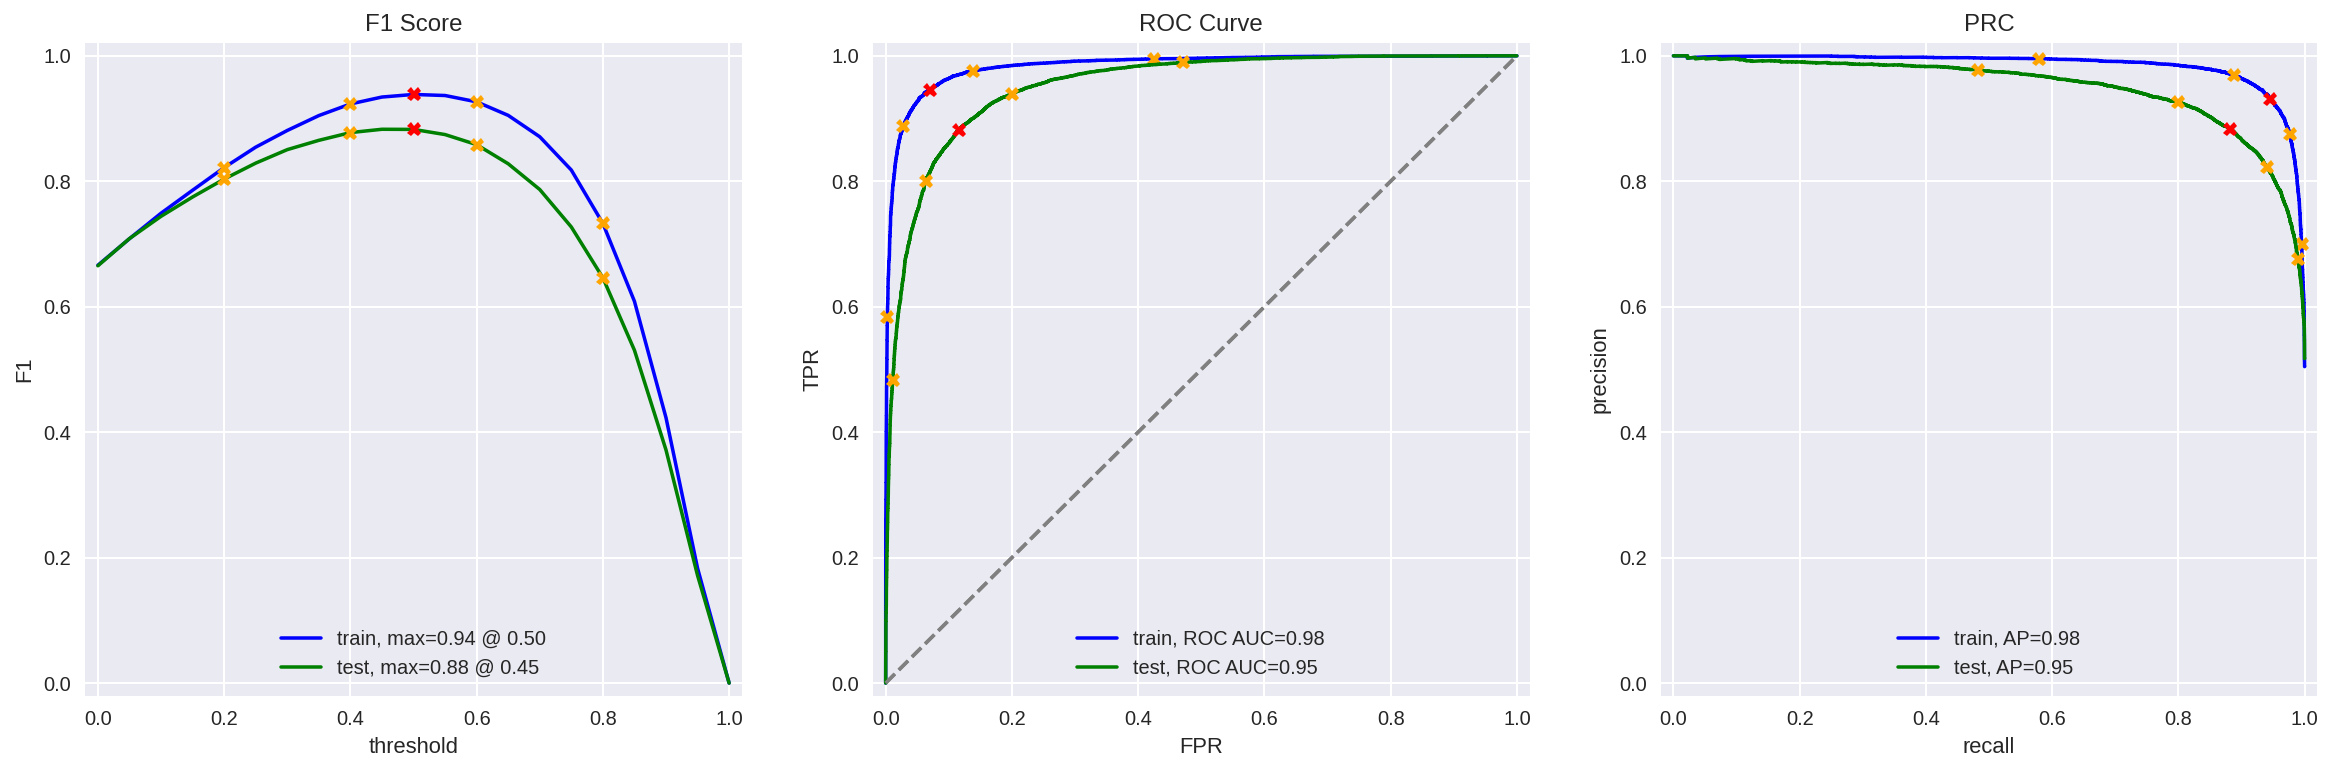

In [32]:
evaluate_model(lr, features_train, train_target, features_test, test_target)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Model 3 - spaCy, TF-IDF dan LR

In [33]:
import spacy

nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])

In [34]:
def text_preprocessing(text):
    
    doc = nlp(text)
    tokens = [token.lemma_ for token in doc]
    
    return ' '.join(tokens)

In [35]:
df_reviews_train['review_tokenized'] = df_reviews_train['review_norm'].apply(lambda x: text_preprocessing(x))

In [36]:
df_reviews_test['review_tokenized'] = df_reviews_test['review_norm'].apply(lambda x: text_preprocessing(x))

In [37]:
print('Melakukan pemeriksaan isi salah satu review train yang sudah ditokenisasi :\n',
      {df_reviews_test['review_norm'][2]})
print()
print()
print()
print('Melakukan pemeriksaan isi salah satu review test yang sudah ditokenisasi :\n', 
      {df_reviews_test['review_norm'][2]})

Melakukan pemeriksaan isi salah satu review train yang sudah ditokenisasi :
 {'there is no real story the film seems more like a fly on the wall dramadocumentary than a proper film so this piece may in itself be a spoiler teen drama about  young singaporean kids very similar to uk chavs who play truant from school run with gangs get into fights insult people on the street get tattoos hang about doing nothing etc etc they generally imagine themselves to be hard and every so often shout challenging rap chants into the camera filmed in mtv style fast cuts crazy camera angles tight close ups and animation interludes the dialogue might have been crisper in the original languages of mandarin and hokkien than in the subtitles and i have no doubt that some of the contemporary singapore references will slip over western heads as well as the cultural and political context unless of course you are familiar with singapore this kind of teen film may be a first for singapore but it has been done bef

In [38]:
tfidf_vectorizer_spacy = TfidfVectorizer()

train_features_spacy = tfidf_vectorizer_spacy.fit_transform(df_reviews_train['review_tokenized'])
print(train_features_spacy.shape)

test_features_spacy = tfidf_vectorizer_spacy.transform(df_reviews_test['review_tokenized'])
print(test_features_spacy.shape)

(23796, 91464)
(23533, 91464)


In [39]:
lr_spacy = LogisticRegression(penalty='l1', solver='liblinear', C=0.5)
lr_spacy.fit(train_features_spacy, train_target)

LogisticRegression(C=0.5, penalty='l1', solver='liblinear')

          train  test
Accuracy   0.87  0.87
F1         0.87  0.87
APS        0.94  0.94
ROC AUC    0.94  0.94


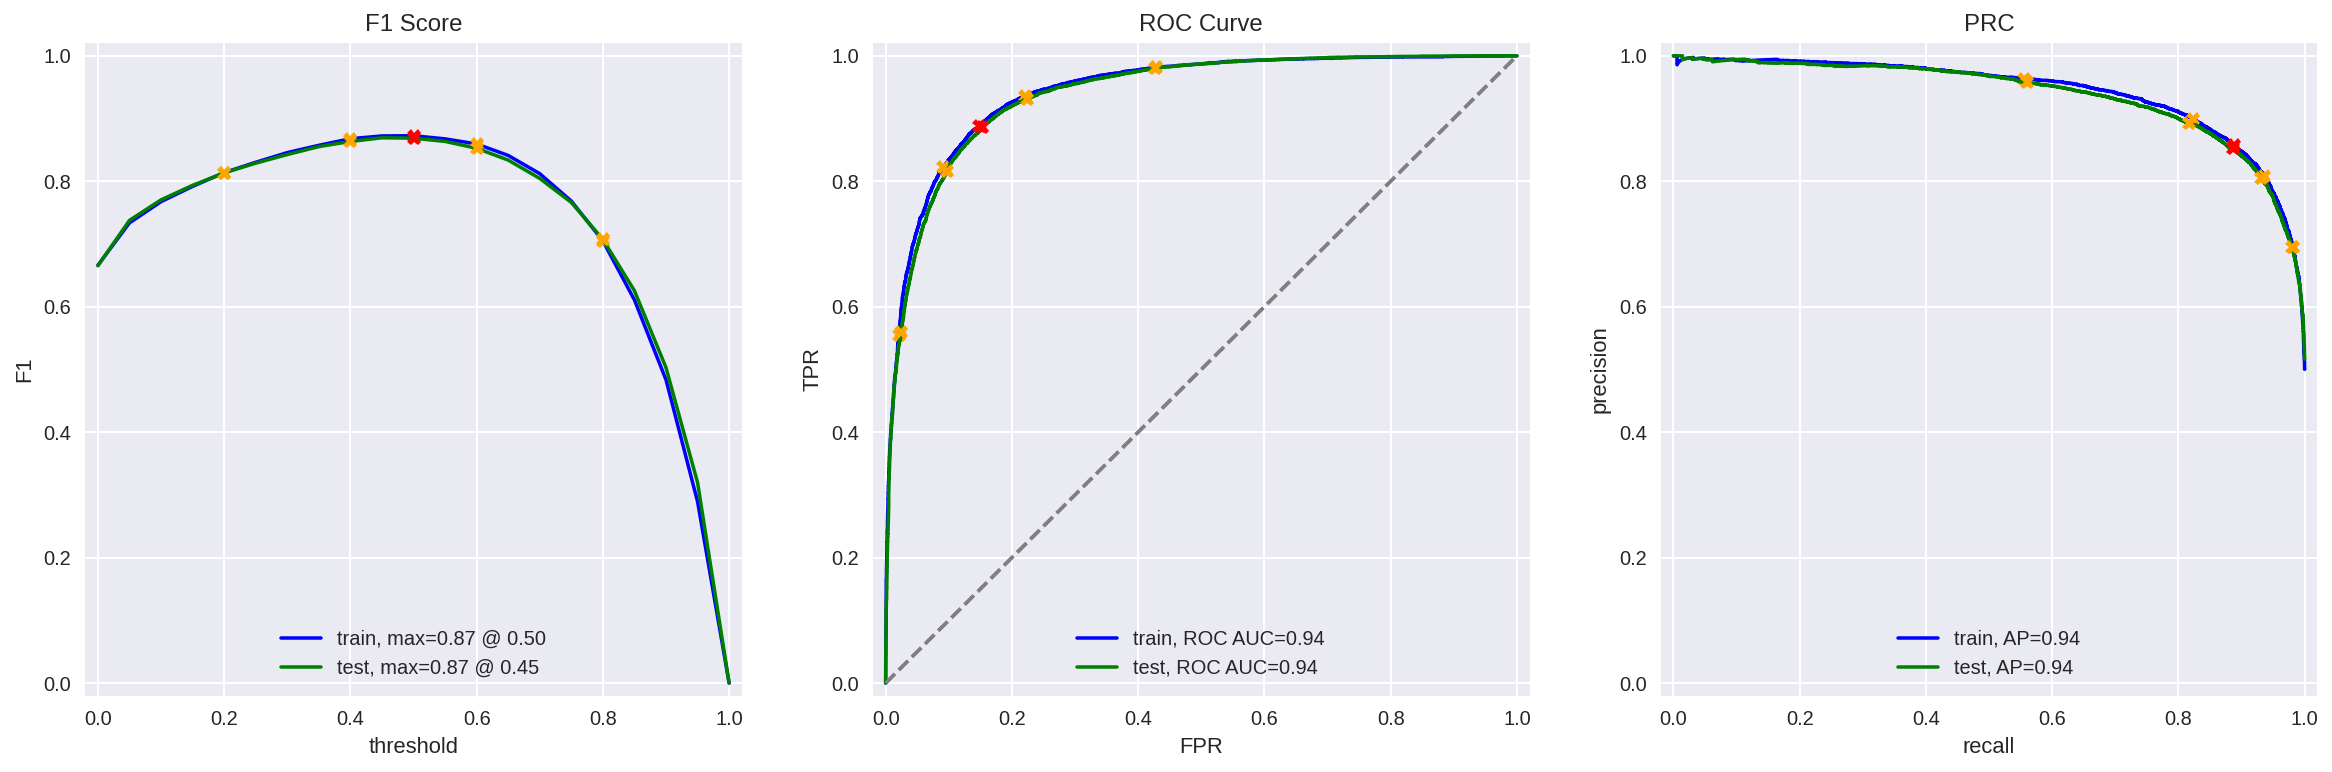

In [40]:
evaluate_model(lr_spacy, train_features_spacy, train_target, test_features_spacy, test_target)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

### Model 4 - spaCy, TF-IDF dan LGBMClassifier

In [41]:
from lightgbm import LGBMClassifier

In [42]:
Lgbm = LGBMClassifier(learning_rate=0.01, max_depth=4)
Lgbm.fit(train_features_spacy, train_target)

LGBMClassifier(learning_rate=0.01, max_depth=4)

          train  test
Accuracy   0.73  0.73
F1         0.76  0.76
APS        0.81  0.81
ROC AUC    0.83  0.82


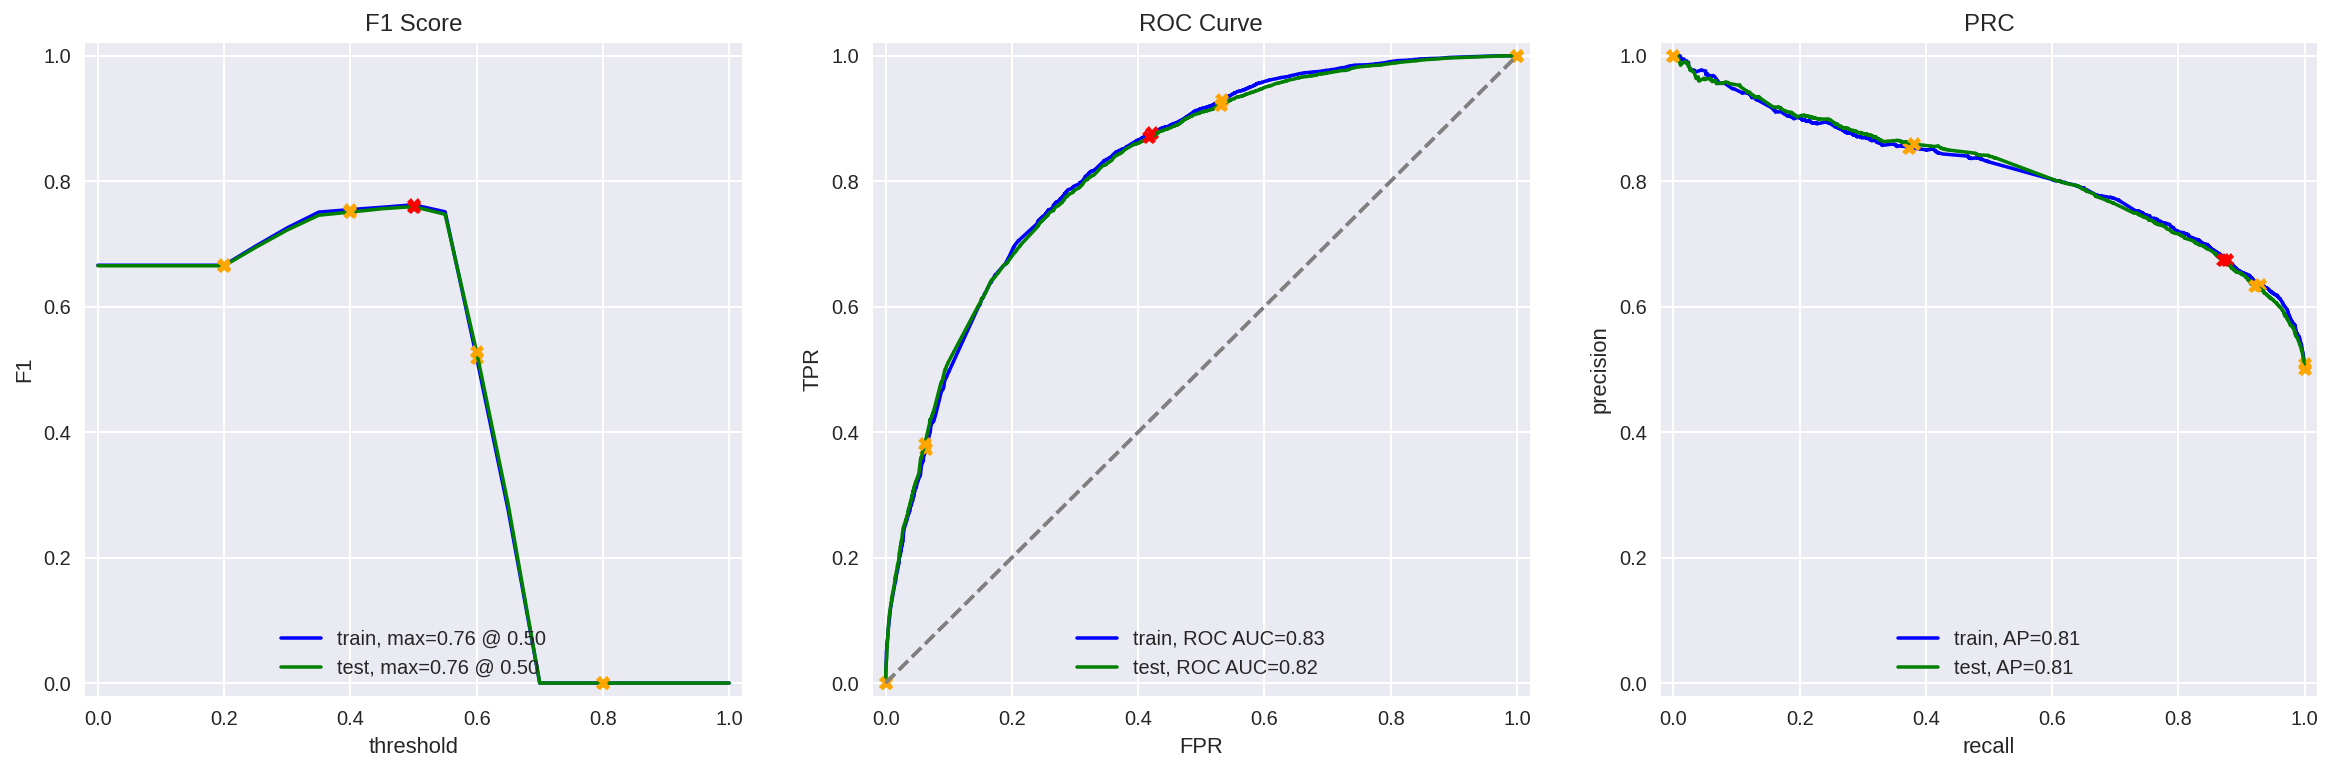

In [43]:
evaluate_model(Lgbm, train_features_spacy, train_target, test_features_spacy, test_target)

<div class="alert alert-success">
<b>Code Reviewers's comment v.1</b> <a class="tocSkip"></a>

Bagus, code yang dijalankan sudah sesuai dengan instruksi dari project.

</div>

###  Model 9 - BERT

In [55]:
import torch
import transformers

In [56]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [57]:
def BERT_text_to_embeddings(texts, max_length=512, batch_size=100, force_device=None, disable_progress_bar=False):
    
    ids_list = []
    attention_mask_list = []

    # teks ke id token yang sudah di-padded bersamaan dengan attention mask
    for input_text in tqdm(texts, disable=disable_progress_bar):
        ids = tokenizer.encode(input_text.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        padded = np.array(ids + [0]*(max_length - len(ids)))
        attention_mask = np.where(padded != 0, 1, 0)
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
    
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Gunakan {device} perangkat.')
    
    # dapatkan embedding dalam batch 

    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list)/batch_size)), disable=disable_progress_bar):
            
        ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)
        # <masukkan kode di sini untuk membuat attention_mask_batch 
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size*i:batch_size*(i+1)]).to(device)
            
        with torch.no_grad():            
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)   
        embeddings.append(batch_embeddings[0][:,0,:].detach().cpu().numpy())
        
    return np.concatenate(embeddings)

In [1]:
# # Perhatian! Menjalankan BERT untuk ribuan teks mungkin memakan waktu lama di CPU, setidaknya beberapa jam
# train_features_bert = BERT_text_to_embeddings(df_reviews_train['review_norm'], force_device='cuda')

In [60]:
# Melakukan pengecekan versi
print(torch.cuda.device_count()) 
print(torch.cuda.is_available())
print(torch.version.cuda)

0
False
10.2


In [ ]:
test_features_bert = BERT_text_to_embeddings(df_reviews_test['review_norm'], force_device=None)

  0%|          | 0/23533 [00:00<?, ?it/s]

Gunakan cpu perangkat.


  0%|          | 0/236 [00:00<?, ?it/s]

/tmp/ipykernel_191/1668069379.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)


In [61]:
print(df_reviews_train['review_norm'].shape)
print(train_features_bert.shape)
print(train_target_bert.shape)

(23796,)


NameError: name 'train_features_bert' is not defined

In [62]:
# jika sudah mendapatkan embedding, disarankan untuk menyimpannya agar siap 
np.savez_compressed('features_9.npz', train_features_bert=train_features_bert, test_features_bert=test_features_bert)

# dan muat...
np.load('features_9.npz') as data:
train_features_bert = data['train_features_bert']
test_features_bert = data['test_features_bert']

SyntaxError: invalid syntax (2850942737.py, line 5)

In [63]:
from sklearn.linear_model import LogisticRegression

model_bert = LogisticRegression(max_iter=1000)
model_bert.fit(train_features_bert, train_target)

NameError: name 'train_features_bert' is not defined

In [64]:
evaluate_model(model_bert, train_features_bert, train_target, test_features_bert, test_target)

NameError: name 'train_features_bert' is not defined

<div class="alert-info">
    

<b>Note</b>

- Terdapat problem dalam proses embidding, Found no NVIDIA driver on your system.

<div class="alert-info">
    

<b>Conclusion</b>

Berdasarkan hasil masing-masing Evaluasi model. 

- Model terbaik dan hampir sempurna yaitu menggunakan Logistic Regression dengan library Spacy. Dimana Akurasi, F1-Score yang melebihi target 0,85 yaitu 0.88 dan (ROC & APS) yang tinggi. pada model ini, hasil dari pelatihan data dan hasi pengujian yang sama persis.
<br>
<br>
- Model terbaik selanjutnya yaitu Logistic Regression dengan library NLTK. Dimana hasil evaluasi sudah melebihi target F1-Score yaitu 0.94. Namun Model ini memiliki hasil yang cukup berbeda antara data pelatihan dengan pengujian. dimana perbedaannya 3-6%
    <br>
<br>
- Pada model lainnya, hasil f1-score tidak mencapai target yaitu dibawah 0.85

## Ulasan Saya

In [69]:
# menguji model dengan review buatan
my_reviews = pd.DataFrame([
    'i did not really enjoy, its not kind of my favorite film', 
    'it is dull, i even slept on the middle of the movie', 
    'that was great, i like it',     
    "Even the actors looked very old and uninterested in the movie. Were they paid to act in the film? Truly low quality.",
    "I didn't expect the movie to be this good! The writers really paid attention to every detail.",
    "This film has its strengths and weaknesses, but overall, I feel it's a worthy film. I might watch it again." ,
    "Some of the jokes were really not funny. Not a single joke landed, everyone behaved annoyingly, even kids wouldn't like this!",
    "Airing this film on Netflix was a bold move & I'm very happy to be able to watch episode after episode of this new, interesting, and intelligent drama."
], columns=['review'])

my_reviews['review_norm'] = my_reviews['review'].apply(lambda x: text_preprocessing(x))

my_reviews

,review,review_norm
0,"i did not really enjoy, its not kind of my fav...","I do not really enjoy , its not kind of my fav..."
1,"it is dull, i even slept on the middle of the ...","it be dull , I even sleep on the middle of the..."
2,"that was great, i like it","that be great , I like it"
3,Even the actors looked very old and uninterest...,even the actor look very old and uninterested ...
4,I didn't expect the movie to be this good! The...,I do not expect the movie to be this good ! th...
5,"This film has its strengths and weaknesses, bu...","this film have its strength and weakness , but..."
6,Some of the jokes were really not funny. Not a...,some of the joke be really not funny . not a s...
7,Airing this film on Netflix was a bold move & ...,air this film on Netflix be a bold move & I be...


### Model NLTK, TF-IDF dan LR

In [70]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = lr.predict_proba(count_tf_idf.transform(texts))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.98:  I do not really enjoy , its not kind of my favorite film
0.02:  it be dull , I even sleep on the middle of the movie
0.99:  that be great , I like it
0.17:  even the actor look very old and uninterested in the movie . be they pay to act in the film ? truly 
0.62:  I do not expect the movie to be this good ! the writer really pay attention to every detail .
0.68:  this film have its strength and weakness , but overall , I feel it be a worthy film . I might watch 
0.10:  some of the joke be really not funny . not a single joke land , everyone behave annoyingly , even ki
0.81:  air this film on Netflix be a bold move & I be very happy to be able to watch episode after episode 


<div class="alert-info">
    

<b>Note</b>

- 1 dari 8 review, ter-prediksi salah. sedangkan review lainnya terbaca masuk akal.

### Model SpaCy, TF-IDF dan LR

In [71]:
texts = my_reviews['review_norm']

my_reviews_pred_prob = lr_spacy.predict_proba(tfidf_vectorizer_spacy.transform(texts.apply(lambda x: text_preprocessing(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

1.00:  I do not really enjoy , its not kind of my favorite film
0.00:  it be dull , I even sleep on the middle of the movie
1.00:  that be great , I like it
0.20:  even the actor look very old and uninterested in the movie . be they pay to act in the film ? truly 
0.34:  I do not expect the movie to be this good ! the writer really pay attention to every detail .
0.69:  this film have its strength and weakness , but overall , I feel it be a worthy film . I might watch 
0.07:  some of the joke be really not funny . not a single joke land , everyone behave annoyingly , even ki
0.78:  air this film on Netflix be a bold move & I be very happy to be able to watch episode after episode 


<div class="alert-info">
    

<b>Note</b>

- 1 dari 8 review, ter-prediksi salah. sedangkan review lainnya terbaca masuk akal.

### Model SpaCy, TF-IDF dan LGBMClassifier

In [72]:
texts = my_reviews['review_norm']

tfidf_vectorizer_4 = tfidf_vectorizer_spacy
my_reviews_pred_prob = Lgbm.predict_proba(tfidf_vectorizer_4.transform(texts.apply(lambda x: text_preprocessing(x))))[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.56:  I do not really enjoy , its not kind of my favorite film
0.58:  it be dull , I even sleep on the middle of the movie
0.66:  that be great , I like it
0.59:  even the actor look very old and uninterested in the movie . be they pay to act in the film ? truly 
0.56:  I do not expect the movie to be this good ! the writer really pay attention to every detail .
0.59:  this film have its strength and weakness , but overall , I feel it be a worthy film . I might watch 
0.56:  some of the joke be really not funny . not a single joke land , everyone behave annoyingly , even ki
0.59:  air this film on Netflix be a bold move & I be very happy to be able to watch episode after episode 


<div class="alert-info">
    

<b>Note</b>

- Model belum bisa membedakan antara review negatif dan positif.

### Model BERT

In [73]:
texts = my_reviews['review_norm']

my_reviews_features_bert = BERT_text_to_embeddings(texts, disable_progress_bar=True)

my_reviews_pred_prob = model_bert.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

/tmp/ipykernel_217/1668069379.py:29: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  ids_batch = torch.LongTensor(ids_list[batch_size*i:batch_size*(i+1)]).to(device)


NameError: name 'my_reviews_features_9' is not defined

<div class="alert-info">
    

<b>Conclusion</b>

Berdasarkan hasil prediksi menggunakan review buatan.

- Model Logistic Regression dengan Library NLTK/SpaCy sudah dapat membedakan review negatif dan positif.

## Kesimpulan

<div class="alert-info">
    

<b>Conclusion</b>

Berdasarkan hasil masing-masing Evaluasi model. 

- Model terbaik dan hampir sempurna yaitu menggunakan Logistic Regression dengan library Spacy. Dimana Akurasi, F1-Score yang melebihi target 0,85 yaitu 0.88 dan (ROC & APS) yang tinggi. pada model ini, hasil dari pelatihan data dan hasi pengujian yang sama persis.
<br>
<br>
- Model terbaik selanjutnya yaitu Logistic Regression dengan library NLTK. Dimana hasil evaluasi sudah melebihi target F1-Score yaitu 0.94. Namun Model ini memiliki hasil yang cukup berbeda antara data pelatihan dengan pengujian. dimana perbedaannya 3-6%
    <br>
<br>
- Pada model lainnya, hasil f1-score tidak mencapai target yaitu dibawah 0.85